# Due data 30th April, Friday


# Index
* [Project Setup](#Setup)
  * [Loading Data](#Loading-Data)
  * [Data Preprocessing](#Data-Preperation)
  * [Quick Setup](#Start-Here---Personal-Setup)
* [Model Trained](#Models)
  * [SVM](#SVM)
  * [Random Forest](#Random-Forest)
    * [Feature Selection](#Feature-Selection)
  * [LinearDiscriminantAnalysis Model](#LinearDiscriminantAnalysis-Model)
  * [Test Bench](#Test-Bench)

# Setup

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

from sklearn import metrics
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split, learning_curve
from sklearn.metrics import classification_report, confusion_matrix, f1_score, make_scorer, cohen_kappa_score
from statistics import mean

from sklearn.utils.multiclass import unique_labels

from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier 

# Loading Data
- [Back To Top](#Index)

In [2]:
# load data for train split instead
train_FNC = pd.read_csv('../../../../mlsp-2014-mri/Train/train_FNC.csv', delimiter=',')
train_SBM = pd.read_csv('../../../../mlsp-2014-mri/Train/train_SBM.csv', delimiter=',')
train_labels = pd.read_csv(  '../../../../mlsp-2014-mri/Train/train_labels.csv', delimiter=',')

test_FNC = pd.read_csv('../../../../mlsp-2014-mri/Test/test_FNC.csv', delimiter=',')
test_SBM = pd.read_csv('../../../../mlsp-2014-mri/Test/test_SBM.csv', delimiter=',')
print('Data load complete')

Data load complete


# Data Preperation
- [Back To Top](#Index)

In [90]:
# Merge data
# Train data
data = pd.merge(train_FNC, train_SBM)
data_2 = pd.merge(data, train_labels)
data_2.to_csv('amalgamated_train_data.csv', index=False)
train_data = pd.read_csv('../../../../mlsp-2014-mri/assign_data/amalgamated_train_data.csv', delimiter=',')

# Test data
test_data = pd.merge(test_FNC, test_SBM)
test_data.to_csv('amalgamated_test_data.csv', index=False)
print('done')
# had to remove index in R because python apparently cant do that 
# R code below 
# data = read.csv("mlsp-2014-mri/amalgamated_train_data.csv", as.is=T, header=T, sep=",")
# write.csv(data[,-1], 'mlsp-2014-mri/assign_data/amalgamated_train_data.csv', row.names = F)

# data = read.csv("mlsp-2014-mri/amalgamated_test_data.csv", as.is=T, header=T, sep=",")
# write.csv(data[,-1], 'mlsp-2014-mri/assign_data/amalgamated_test_data.csv', row.names = F)

done


# Start Here - Personal Setup 
- [Back To Top](#Index)

In [2]:
# This cell just loads data and prepares it so i can run models using it #

# load data
train_data = pd.read_csv('../../../../mlsp-2014-mri/assign_data/amalgamated_train_data.csv', delimiter=',', index_col=False)
test_data = pd.read_csv('../../../../mlsp-2014-mri/assign_data/amalgamated_test_data.csv', delimiter=',', index_col=False)
# convert test data to df from numpy array
test_data_df = pd.DataFrame(test_data)

# Prepare values for training data
labels = train_data.pop('Class').values
data = train_data.values

# load data for submition
submition_csv = pd.read_csv(  '../../../../mlsp-2014-mri/submission_example.csv', delimiter=',')
scaler = StandardScaler()

print('Data load & setup complete')

Data load & setup complete


# Models

* [Back To Top](#Index)
    * [SVM - 85.6%](#SVM)
    * [Random Forest - 74.6%](#Random-Forest)
    * [LinearDiscriminantAnalysis Model - 82.8%](#LinearDiscriminantAnalysis)
    * [Test Bench](#Test-Bench)

# SVM

- SVM Model - Kaggle best 85.6% 
- [Back To Top](#Index)
- [Models](#Models)
---------------------------
- [Learn Rate - SVM](#Learn-Rate-SVM)
- [ROC - SVM](#ROC-SVM)

In [14]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(data, labels, 
                                                    test_size=0.3, 
                                                    random_state=104) 


# Create a svm Classifier
clf = svm.SVC(kernel='sigmoid') # Best Kernel was Sigmoid 
#Train the model using the training sets
clf.fit(X_train, y_train)
#Predict the response for test dataset
clf.score(X_train, y_train)
m_svm = clf.predict(X_test) 

    
####################
# Model Evaluation #
####################
print ('Model Evaluation')
# Model Accuracy: how often is the classifier correct
print("Model Accuracy:", round(metrics.accuracy_score(y_test, m_svm), 3))
# Model Precision: what percentage of positive tuples are labeled as such
print("Model Precision:", round(metrics.precision_score(y_test, m_svm), 3))
# Model Recall: what percentage of positive tuples are labelled as such
print("Model Recall:", round(metrics.recall_score(y_test, m_svm), 3))
# Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
print('F1 Score: ', round(f1_score(y_test, m_svm, average="macro"), 3))

print('Cohens Kappa :', round(cohen_kappa_score(y_test , m_svm), 3))
# Combination of Accuracy, Precision, Recall 
print("Classification Report :\n", classification_report(y_test,m_svm))

cvs = cross_val_score(clf, data, labels, cv=10)

print('K-fold Cross Validation scores:')
print('Max Score: ', round(max(cvs), 3))
print('Min Score: ', round(min(cvs), 3))
print('Mean Score :', round(mean(cvs), 3))

##############################
# Testing model on test data #
##############################

X_test, y_test = train_test_split(test_data_df, test_size=1, random_state=104) # 70% training and 30% testprint("after split check", len(X_test),  len(y_test))
m_svm = clf.predict(test_data_df)
# probability preformed really bad, so i think 0 or 1 is a better 
# y_predict_proba = clf.predict_proba(test_data_df)
submition_csv['Probability'] = m_svm
submition_csv.to_csv('m_svm_submition.csv', index=False)

Model Evaluation
Model Accuracy: 0.808
Model Precision: 0.9
Model Recall: 0.692
F1 Score:  0.805
Cohens Kappa : 0.615
Classification Report :
               precision    recall  f1-score   support

           0       0.75      0.92      0.83        13
           1       0.90      0.69      0.78        13

    accuracy                           0.81        26
   macro avg       0.82      0.81      0.81        26
weighted avg       0.83      0.81      0.81        26

K-fold Cross Validation scores:
Max Score:  0.889
Min Score:  0.556
Mean Score : 0.768


In [ ]:
# I tried using this to find a better random_state but 
# I couldnt retrieve the number
# Private score 0.82820
# Public score 0.83928

# after toying around with retrieving the random state var 
# I used binary searchs logic to find 104 as being the best, 
# I assume there would be a better/more elegant way of doing this

# from sklearn.utils import check_random_state
best_acc = 0
# best_state = 0
# removed random_state=109
for _ in range(100):
    # Split dataset into training set and test set
    X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3) 
    # 70% training and 30% test
    # Create a svm Classifier
    clf = svm.SVC(kernel='sigmoid') # Best Kernel was Sigmoid 
    #Train the model using the training sets
    clf.fit(X_train, y_train)
    #Predict the response for test dataset
    acc = clf.score(X_train, y_train)
    state = check_random_state(clf.random_state)
    # print(acc)
    if acc > best_acc:  
        best_acc = acc
        # best_state = state
        m_svm = clf.predict(X_test)    
# print('state: ', state)    
print('best: ', best_acc)


### ROC SVM
- [Back To Top](#Index)
- [Models](#Models)
- [Start of SVM](#SVM)

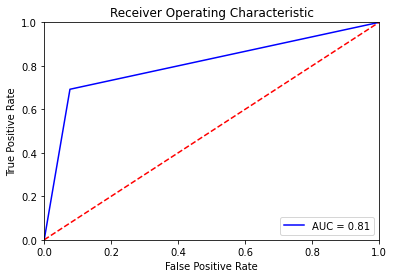

In [140]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, 
                                                    test_size=0.3, 
                                                    random_state=104) 
m_svm = clf.predict(X_test)

fpr, tpr, threshold = metrics.roc_curve(y_test, m_svm)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Learn Rate SVM
- [Back To Top](#Index)
- [Models](#Models)
- [Start of SVM](#SVM)

Text(0, 0.5, 'Accuracy Score')

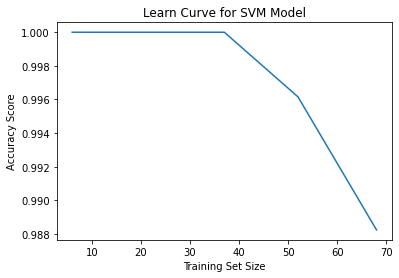

In [142]:
# Learn rate Curve
# uses k-cross validation = 5 by default
train_sizes, train_scores, test_scores = learning_curve(estimator = SVC(), 
                                                        X = data, 
                                                        y = labels,
                                                        cv=5,
                                                        scoring='accuracy',
                                                        n_jobs=-1)

plt.plot(train_sizes, np.mean(train_scores, axis=1))
plt.title("Learn Curve for SVM Model")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")

In [ ]:
# Interpretation of Results 
It seems that 

# Random Forest 
- Kaggle best 74.6%
- [Back To Top](#Index)
- [Models](#Models)

-------------------
- [Feature Selection](#Feature-Selection)
- [Learn Rate - Random Forest](#Learn-Rate-Random-Forest)
- [ROC - Random Forest](#ROC-Random-Forest)

In [77]:
# random state yielded the best local result
X_train, X_test, y_train, y_test = train_test_split(data, labels, 
                                                    test_size=0.3, 
                                                    random_state=100)

clf=RandomForestClassifier(criterion='entropy')
clf.fit(X_train,y_train)

m_random_forest = clf.predict(X_test)

####################
# Model Evaluation #
####################
print ('Model Evaluation')
# Model Accuracy: how often is the classifier correct
print("Model Accuracy:", round(metrics.accuracy_score(y_test, m_random_forest), 3))
# Model Precision: what percentage of positive tuples are labeled as such
print("Model Precision:", round(metrics.precision_score(y_test, m_random_forest), 3))
# Model Recall: what percentage of positive tuples are labelled as such
print("Model Recall:", round(metrics.recall_score(y_test, m_random_forest), 3))
# Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
print('F1 Score: ', round(f1_score(y_test, m_random_forest, average="macro"), 3))

print('Cohens Kappa :', round(cohen_kappa_score(y_test , m_random_forest), 3))
# Combination of Accuracy, Precision, Recall 
print("Classification Report :\n", classification_report(y_test, m_random_forest))

cvs = cross_val_score(clf, data, labels, cv=10)

print('K-fold Cross Validation scores:')
print('Max Score: ', round(max(cvs), 3))
print('Min Score: ', round(min(cvs), 3))
print('Mean Score :', round(mean(cvs), 3))


##############################
# Testing model on test data #
##############################

X_test, y_test = train_test_split(test_data_df, test_size=1, random_state=100) # 70% training and 30% testprint("after split check", len(X_test),  len(y_test))
m_random_forest = clf.predict(test_data_df)
# probability preformed really bad, so i think 0 or 1 is a better 
# y_predict_proba = clf.predict_proba(test_data_df)
submition_csv['Probability'] = m_random_forest
submition_csv
submition_csv.to_csv('m_random_forest_submition.csv', index=False)

Model Evaluation
Model Accuracy: 0.808
Model Precision: 0.8
Model Recall: 0.727
F1 Score:  0.8
Cohens Kappa : 0.601
Classification Report :
               precision    recall  f1-score   support

           0       0.81      0.87      0.84        15
           1       0.80      0.73      0.76        11

    accuracy                           0.81        26
   macro avg       0.81      0.80      0.80        26
weighted avg       0.81      0.81      0.81        26

K-fold Cross Validation scores:
Max Score:  0.875
Min Score:  0.444
Mean Score : 0.688


# Feature Selection
- [Back To Top](#Index)
- [Models](#Models)
- [Top of Random Forest](#Random-Forest)

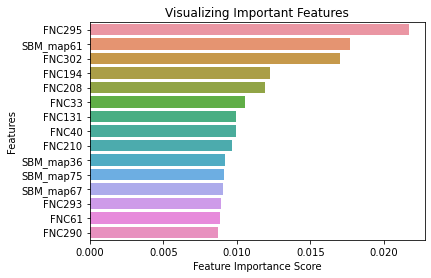

In [100]:
X_train, X_test, y_train, y_test = train_test_split(data, labels,
                                                    test_size=0.3,
                                                    random_state=100) 

# Predict the response for test dataset
# sc = StandardScaler()
# x_train = sc.fit_transform(X_train)
# x_test = sc.transform(X_test)

clf=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
clf.fit(X_train,y_train)

m_random_forest = clf.predict(X_test)

feature_imp = pd.Series(clf.feature_importances_, index=train_data.columns).sort_values(ascending=False)

# keep top 15 values
top_ten_features = feature_imp.nlargest(15, keep='all')

%matplotlib inline
# Creating a bar plot
sns.barplot(x=top_ten_features, y=top_ten_features.index)
# labels
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
# the legend works but takes up space and isnt needed
# plt.legend(top_ten_features.keys())
plt.show()

##############################
# Testing model on test data #
##############################
top_ten_labels = list(train_data[top_ten_features.keys()].keys())
top_ten_data = train_data[top_ten_features.keys()].values
# extracted 15 features 
train_data_2 = train_data[top_ten_labels]


### ROC Random Forest
- [Back To Top](#Index)
- [Models](#Models)
- [Top of Random Forest](#Random-Forest)

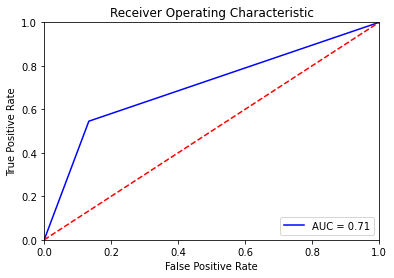

In [242]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, 
                                                    test_size=0.3, 
                                                    random_state=100) 
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
m_randomForest = clf.predict(X_test)

fpr, tpr, threshold = metrics.roc_curve(y_test, m_randomForest)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Learn Rate Random Forest
- [Back To Top](#Index)
- [Models](#Models)
- [Top of Random Forest](#Random-Forest)

Text(0, 0.5, 'Accuracy Score')

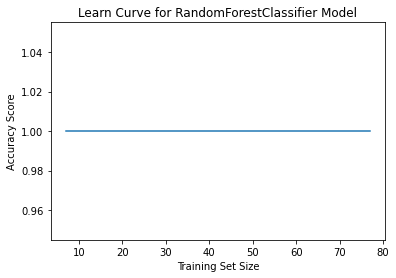

In [249]:
# Learn rate Curve
# uses k-cross validation = 5 by default
train_sizes, train_scores, test_scores = learning_curve(estimator = RandomForestClassifier(), 
                                                        X = data, 
                                                        y = labels,
                                                        cv=10,
                                                        scoring='accuracy',
                                                        n_jobs=-1)

plt.plot(train_sizes, np.mean(train_scores, axis=1))
plt.title("Learn Curve for SVM Model")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")

# LinearDiscriminantAnalysis
- Kaggle best 82.8%
- [Back To Top](#Index)
- [Models](#Models)
----------------
- [Learn Rate LDA](#Learn-Rate-LDA)
- [ROC-LDA](#ROC-LDA)
- [Top of Linear Discriminant Analysis](#LinearDiscriminantAnalysis)

In [3]:
# Private Score 0.82820
# Public Score 0.63839

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=25) # 70% training and 30% test
#Create a LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
linear_disc_analysis_m = clf.predict(X_test)

####################
# Model Evaluation #
####################
print ('Model Evaluation')
# Model Accuracy: how often is the classifier correct
print("Model Accuracy:", round(metrics.accuracy_score(y_test, linear_disc_analysis_m), 3))
# Model Precision: what percentage of positive tuples are labeled as such
print("Model Precision:", round(metrics.precision_score(y_test, linear_disc_analysis_m), 3))
# Model Recall: what percentage of positive tuples are labelled as such
print("Model Recall:", round(metrics.recall_score(y_test, linear_disc_analysis_m), 3))
# Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
print('F1 Score: ', round(f1_score(y_test, linear_disc_analysis_m, average="macro"), 3))

print('Cohens Kappa :', round(cohen_kappa_score(y_test , linear_disc_analysis_m), 3))
# Combination of Accuracy, Precision, Recall 
print("Classification Report :\n", classification_report(y_test, linear_disc_analysis_m))

cvs = cross_val_score(clf, data, labels, cv=10)

print('K-fold Cross Validation scores:')
print('Max Score: ', round(max(cvs), 3))
print('Min Score: ', round(min(cvs), 3))
print('Mean Score :', round(mean(cvs), 3))


##############################
# Testing model on test data #
##############################

X_test, y_test = train_test_split(test_data_df, test_size=1, random_state=25)
linear_disc_analysis_m = clf.predict(test_data_df)
# probability preformed really bad, so i think 0 or 1 is a better 
# y_predict_proba = clf.predict_proba(test_data_df)
submition_csv['Probability'] = linear_disc_analysis_m
submition_csv
submition_csv.to_csv('linear_disc_analysis_m_submition.csv', index=False)


Model Evaluation
Model Accuracy: 0.769
Model Precision: 0.833
Model Recall: 0.714
F1 Score:  0.769
Cohens Kappa : 0.541
Classification Report :
               precision    recall  f1-score   support

           0       0.71      0.83      0.77        12
           1       0.83      0.71      0.77        14

    accuracy                           0.77        26
   macro avg       0.77      0.77      0.77        26
weighted avg       0.78      0.77      0.77        26

K-fold Cross Validation scores:
Max Score:  0.889
Min Score:  0.333
Mean Score : 0.661


### Learn Rate LDA
- [Back To Top](#Index)
- [Models](#Models)
- [Top of LinearDiscriminantAnalysis](#LinearDiscriminantAnalysis)

Text(0, 0.5, 'Accuracy Score')

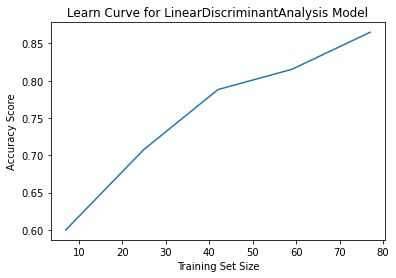

In [5]:
# Learn rate Curve
# uses k-cross validation = 5 by default
train_sizes, train_scores, test_scores = learning_curve(estimator = LinearDiscriminantAnalysis(), 
                                                        X = data, 
                                                        y = labels,
                                                        cv=10,
                                                        scoring='accuracy',
                                                        n_jobs=-1)

plt.plot(train_sizes, np.mean(train_scores, axis=1))
plt.title("Learn Curve for LinearDiscriminantAnalysis Model")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")

### ROC-LDA
- [Back To Top](#Index)
- [Models](#Models)
- [Top of LinearDiscriminantAnalysis](#LinearDiscriminantAnalysis)

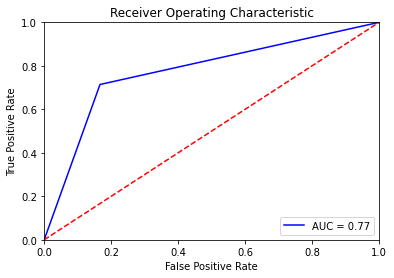

In [11]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, 
                                                    test_size=0.3, 
                                                    random_state=25) 
clf = LinearDiscriminantAnalysis()
clf.fit(X_train,y_train)
m_randomForest = clf.predict(X_test)

fpr, tpr, threshold = metrics.roc_curve(y_test, m_randomForest)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Test Bench
- Kaggle best 0.0%
- [Back To Top](#Index)
- [Models](#Models)

In [108]:
#from sklearn.model_selection import GridSearchCV
#clf = GridSearchCV(MLPClassifier(), param_grid, cv=3,                          scoring='accuracy')
#clf.fit(X,y)
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
#print("Best parameters set found on development set:")
#print(clf.best_params_)
###########################
#  Model -  #
###########################

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size= 0.3, random_state=5)

clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

clf.fit(X_train, y_train)
m_test = mlp.predict(test_data_df)

####################
# Model Evaluation #
####################
print ('Model Evaluation')




submition_csv['Probability'] = m_test
submition_csv.loc[submition_csv['Probability'] == -1, 'Probability'] = 0
submition_csv.to_csv('test_submition.csv', index=False)

Model Evaluation
